In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch.nn as nn
import numpy as np
import torch.nn.functional as F


class ContrastiveLoss(nn.Module):
    "Contrastive loss function"

    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2)
        loss_contrastive = torch.mean(
            (1 - label) * torch.pow(euclidean_distance, 2)
            + (label)
            * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2)
        )

        return loss_contrastive


In [ ]:
def imshow(img, text=None, should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(
            75,
            8,
            text,
            style="italic",
            fontweight="bold",
            bbox={"facecolor": "white", "alpha": 0.8, "pad": 10},
        )
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


def show_plot(iteration, loss):
    plt.plot(iteration, loss)
    plt.show()

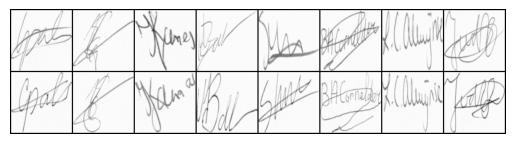

[[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]]


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch number 1
 Current loss 1.1552762985229492

Epoch number 2
 Current loss 1.1209220886230469

Epoch number 3
 Current loss 1.6749541759490967

Epoch number 4
 Current loss 1.2811254262924194

Epoch number 5
 Current loss 1.2966455221176147

Epoch number 6
 Current loss 0.7928737998008728

Epoch number 7
 Current loss 1.1332906484603882

Epoch number 8
 Current loss 1.127215027809143

Epoch number 9
 Current loss 1.1386908292770386

Epoch number 10
 Current loss 1.0127021074295044

Epoch number 11
 Current loss 1.2992238998413086

Epoch number 12
 Current loss 1.3350058794021606

Epoch number 13
 Current loss 1.5468872785568237

Epoch number 14
 Current loss 1.1359367370605469

Epoch number 15
 Current loss 1.1059690713882446

Epoch number 16
 Current loss 1.11948823928833

Epoch number 17
 Current loss 1.0451115369796753

Epoch number 18
 Current loss 0.904194176197052

Epoch number 19
 Current loss 1.0442904233932495

Epoch number 20
 Current loss 1.0343888998031616

Epoch number 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


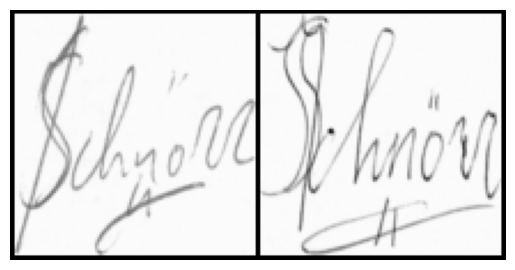

Predicted Eucledian Distance:- 0.5071139335632324
Actual Label:- Forged Pair Of Signature


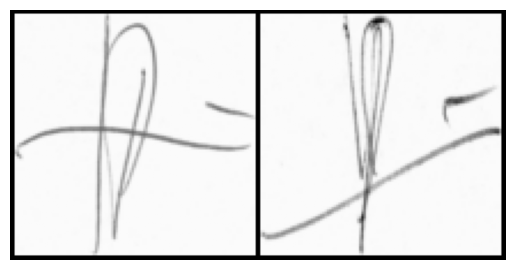

Predicted Eucledian Distance:- 0.1144709661602974
Actual Label:- Forged Pair Of Signature


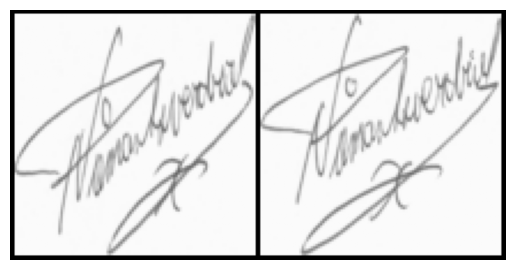

Predicted Eucledian Distance:- 0.20756152272224426
Actual Label:- Original Pair Of Signature


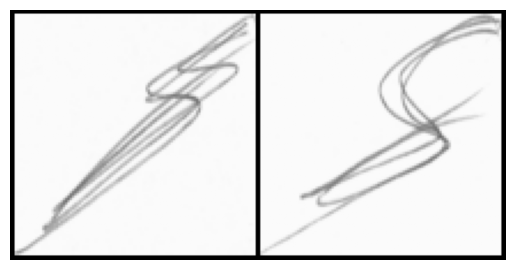

Predicted Eucledian Distance:- 0.843795120716095
Actual Label:- Original Pair Of Signature


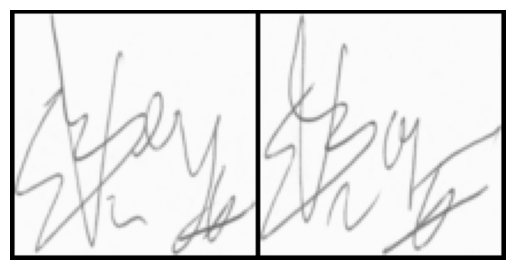

Predicted Eucledian Distance:- 0.8584457635879517
Actual Label:- Original Pair Of Signature


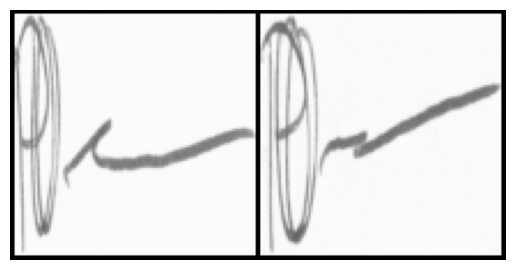

Predicted Eucledian Distance:- 0.4017663598060608
Actual Label:- Original Pair Of Signature


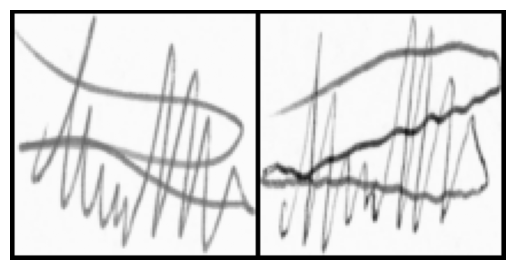

Predicted Eucledian Distance:- 1.0395145416259766
Actual Label:- Forged Pair Of Signature


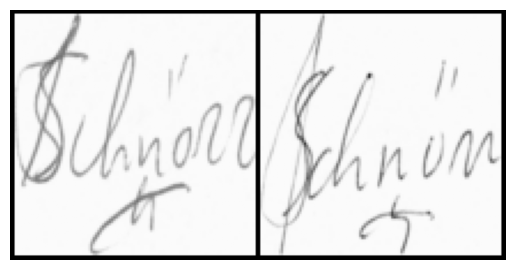

Predicted Eucledian Distance:- 1.0657217502593994
Actual Label:- Forged Pair Of Signature


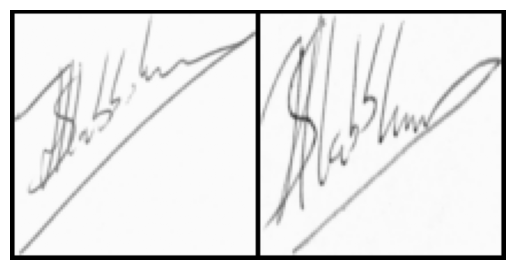

Predicted Eucledian Distance:- 0.17974723875522614
Actual Label:- Forged Pair Of Signature


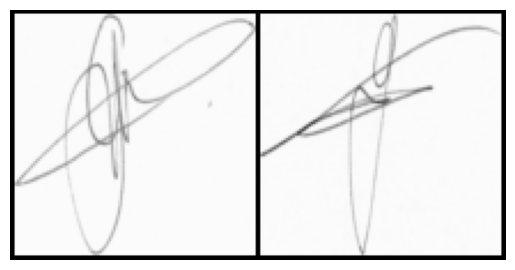

Predicted Eucledian Distance:- 0.7277428507804871
Actual Label:- Forged Pair Of Signature


In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import torchvision.utils
import torchvision
from torch.autograd import Variable
from PIL import Image
import PIL.ImageOps
import os


# load the dataset
training_dir = "/content/drive/My Drive/train/train"
training_csv = "/content/drive/My Drive/train_data.csv"
testing_csv = "/content/drive/My Drive/test_data.csv"
testing_dir = "/content/drive/My Drive/test/test"
batch_size = 32
epochs = 30


# preprocessing and loading the dataset
class SiameseDataset:
    def __init__(self, training_csv=None, training_dir=None, transform=None):
        # used to prepare the labels and images path
        self.train_df = pd.read_csv(training_csv)
        self.train_df.columns = ["image1", "image2", "label"]
        self.train_dir = training_dir
        self.transform = transform

    def __getitem__(self, index):

        # getting the image path
        image1_path = os.path.join(self.train_dir, self.train_df.iat[index, 0])
        image2_path = os.path.join(self.train_dir, self.train_df.iat[index, 1])

        # Loading the image
        img0 = Image.open(image1_path)
        img1 = Image.open(image2_path)
        img0 = img0.convert("L")
        img1 = img1.convert("L")

        # Apply image transformations
        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)

        return (
            img0,
            img1,
            torch.from_numpy(
                np.array([int(self.train_df.iat[index, 2])], dtype=np.float32)
            ),
        )

    def __len__(self):
        return len(self.train_df)


# Load the the dataset from raw image folders
siamese_dataset = SiameseDataset(
    training_csv,
    training_dir,
    transform=transforms.Compose(
        [transforms.Resize((105, 105)), transforms.ToTensor()]
    ),
)


# Viewing the sample of images and to check whether its loading properly
vis_dataloader = DataLoader(siamese_dataset, shuffle=True, batch_size=8)
dataiter = iter(vis_dataloader)


example_batch = next(dataiter)
concatenated = torch.cat((example_batch[0], example_batch[1]), 0)
imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())


#create a siamese network
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()

        # Setting up the Sequential of CNN Layers
        self.cnn1 = nn.Sequential(

            nn.Conv2d(1, 96, kernel_size=11,stride=1),
            nn.BatchNorm2d(96),
            #nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            #nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.3),

            nn.Conv2d(256,384 , kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(inplace=True),

            nn.Conv2d(384,256 , kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.3),

        )

        # Defining the fully connected layers
        self.fc1 = nn.Sequential(
            nn.Linear(30976, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=0.5),

            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),

            nn.Linear(128,2))



    def forward_once(self, x):
        # Forward pass
        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        # forward pass of input 1
        output1 = self.forward_once(input1)
        # forward pass of input 2
        output2 = self.forward_once(input2)
        return output1, output2

 # Load the dataset as pytorch tensors using dataloader
train_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=batch_size)


# Declare Siamese Network
net = SiameseNetwork().cuda()
# Decalre Loss Function
criterion = ContrastiveLoss()
# Declare Optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3, weight_decay=0.0005)

#train the model
def train(train_dataloader):
    loss=[]
    counter=[]
    iteration_number = 0
    for epoch in range(1,epochs):
      for i, data in enumerate(train_dataloader,0):
        img0, img1 , label = data
        img0, img1 , label = img0.cuda(), img1.cuda() , label.cuda()
        optimizer.zero_grad()
        output1,output2 = net(img0,img1)
        loss_contrastive = criterion(output1,output2,label)
        loss_contrastive.backward()
        optimizer.step()

      print(f"Epoch number {epoch}\n Current loss {loss_contrastive.item()}\n")

      loss.append(loss_contrastive.item())
    # loss = np.array(loss)
    return net

model = train(train_dataloader)
# def eval(eval_dataloader):
#     loss=[]
#     counter=[]
#     iteration_number = 0
#     for i, data in enumerate(eval_dataloader,0):
#       img0, img1 , label = data
#       img0, img1 , label = img0.cuda(), img1.cuda() , label.cuda()
#       output1,output2 = net(img0,img1)
#       loss_contrastive = criterion(output1,output2,label)
#       loss.append(loss_contrastive.item())
#     loss = np.array(loss)
#     return loss.mean()/len(eval_dataloader)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# for epoch in range(1,epochs):
#   best_eval_loss = 9999
#   train_loss = train(train_dataloader)
#   # eval_loss = eval(eval_dataloader)

#   print(f"Training loss{train_loss}")
#   print("-"*20)
#   print(f"Eval loss{eval_loss}")

#   if eval_loss<best_eval_loss:
#     best_eval_loss = eval_loss
#     print("-"*20)
#     print(f"Best Eval loss{best_eval_loss}")
torch.save(model.state_dict(), "/content/model.pt")
print("Model Saved Successfully")

# Load the test dataset
test_dataset = SiameseDataset(
    training_csv=testing_csv,
    training_dir=testing_dir,
    transform=transforms.Compose(
        [transforms.Resize((105, 105)), transforms.ToTensor()]
    ),
)

test_dataloader = DataLoader(test_dataset, num_workers=6, batch_size=1, shuffle=True)

count = 0
for i, data in enumerate(test_dataloader, 0):
    x0, x1, label = data
    concat = torch.cat((x0, x1), 0)
    output1, output2 = model(x0.to(device), x1.to(device))

    eucledian_distance = F.pairwise_distance(output1, output2)

    if label == torch.FloatTensor([[0]]):
        label = "Original Pair Of Signature"
    else:
        label = "Forged Pair Of Signature"

    imshow(torchvision.utils.make_grid(concat))
    print("Predicted Eucledian Distance:-", eucledian_distance.item())
    print("Actual Label:-", label)
    count = count + 1
    if count == 10:
        break